In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                      # Importing the required libraries
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data5.csv')
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()   


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df.shape


(400, 5)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.dtypes


User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df.describe()    


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.corr()  


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

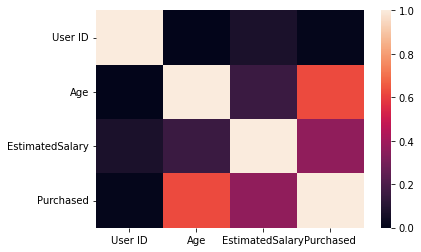

In [11]:
sns.heatmap(df.corr())

In [12]:
df['Purchased'].value_counts()


0    257
1    143
Name: Purchased, dtype: int64

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
pip install scikit-learn

     |████████████████████████████████| 31.2 MB 66 kB/s  eta 0:00:01
     |████████████████████████████████| 306 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.preprocessing import LabelEncoder # used for encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  #OneHot Encoding consists of turning the gender column into two separate columns, each column consists of 0s and 1s. 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# [1] signifies the index of the column we are appliying the encoding on
data = pd.DataFrame(ct.fit_transform(df))
le = LabelEncoder()
data.iloc[:,-1] = le.fit_transform(data.iloc[:,-1])
# 'data.iloc[:,-1]' is used to select the column that we need to be encoded


In [17]:
data

,0,1,2,3,4,5
0,0.0,1.0,15624510.0,19.0,19000.0,0
1,0.0,1.0,15810944.0,35.0,20000.0,0
2,1.0,0.0,15668575.0,26.0,43000.0,0
3,1.0,0.0,15603246.0,27.0,57000.0,0
4,0.0,1.0,15804002.0,19.0,76000.0,0
...,...,...,...,...,...,...
395,1.0,0.0,15691863.0,46.0,41000.0,1
396,0.0,1.0,15706071.0,51.0,23000.0,1
397,1.0,0.0,15654296.0,50.0,20000.0,1
398,0.0,1.0,15755018.0,36.0,33000.0,0


In [18]:
data.columns=['Male','Female','User ID','Age','EstimatedSalary','Purchased']

# adding column name to the respective columns
team.columns =['Name', 'Code', 'Age', 'Weight']

In [19]:
data

,Male,Female,User ID,Age,EstimatedSalary,Purchased
0,0.0,1.0,15624510.0,19.0,19000.0,0
1,0.0,1.0,15810944.0,35.0,20000.0,0
2,1.0,0.0,15668575.0,26.0,43000.0,0
3,1.0,0.0,15603246.0,27.0,57000.0,0
4,0.0,1.0,15804002.0,19.0,76000.0,0
...,...,...,...,...,...,...
395,1.0,0.0,15691863.0,46.0,41000.0,1
396,0.0,1.0,15706071.0,51.0,23000.0,1
397,1.0,0.0,15654296.0,50.0,20000.0,1
398,0.0,1.0,15755018.0,36.0,33000.0,0


In [20]:
#To check if the data is equally balanced between the target classes
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [21]:
#Defining features and target variable
y = data['Purchased'] #target variable we want to predict 
X = data.drop(columns = ['Purchased']) #set of required features, in this case all


In [22]:
from sklearn.model_selection import train_test_split
#Splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train) #fitting the model 
y_pred = LR.predict(X_test) #prediction

In [24]:
#Evaluation of Model - Confusion Matrix Plot
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[60  3]
 [22 15]]


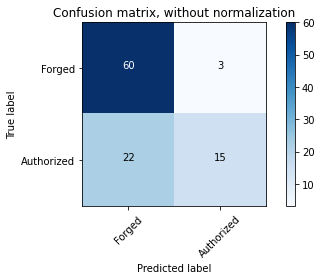

In [26]:

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Forged','Authorized'],
                      title='Confusion matrix, without normalization')

In [27]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  60
False Positives:  3
False Negatives:  22
True Positives:  15


In [28]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:", format(Accuracy))

Accuracy {:0.2f}%: 75.0


In [29]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}",format(Precision))

Precision {:0.2f} 0.8333333333333334


In [30]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}",format(Recall))

Recall {:0.2f} 0.40540540540540543


In [31]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}",format(f1))

F1 Score {:0.2f} 0.5454545454545455


In [32]:
#F-beta score calculation
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}",format(f2))
print("\nF0.5 {:0.2f}",format(f0_5))

F2 {:0.2f} 0.4518072289156627

F0.5 {:0.2f} 0.6880733944954129


In [33]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}",format(Specificity))

Specificity {:0.2f} 0.9523809523809523
